<a href="https://colab.research.google.com/github/magda-moreno/something/blob/main/Lab6_Retailer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
df = pd.read_csv (r'/content/gdrive/MyDrive/IS 4487/superstore_retail_orders.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [5]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [6]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values

In [7]:
df = df[df.product_price != 235481]
values = [100000, 2000, 600, 500, 200, 100, 20]
df = df[df.quantity.isin(values) == False ]
df.describe()

,order_id,quantity,product_price
count,54706.000000,54667.000000,54706.000000
mean,61637.235459,1.490332,613.339326
std,7523.801734,0.610216,816.490837
min,45079.000000,1.000000,2.290000
25%,55609.000000,1.000000,7.950000
50%,61843.000000,1.000000,475.600000
75%,68069.000000,2.000000,914.620000
max,74147.000000,5.000000,3578.270000


In [8]:
df.dropna(inplace=True)

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
#df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54112 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54112 non-null  int64         
 1   order_date        54112 non-null  datetime64[ns]
 2   order_year_month  54112 non-null  object        
 3   customer_name     54112 non-null  object        
 4   city              54112 non-null  object        
 5   state_province    54112 non-null  object        
 6   quantity          54112 non-null  float64       
 7   product_name      54112 non-null  object        
 8   product_line      54112 non-null  object        
 9   product_price     54112 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.5+ MB


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

<Axes: >

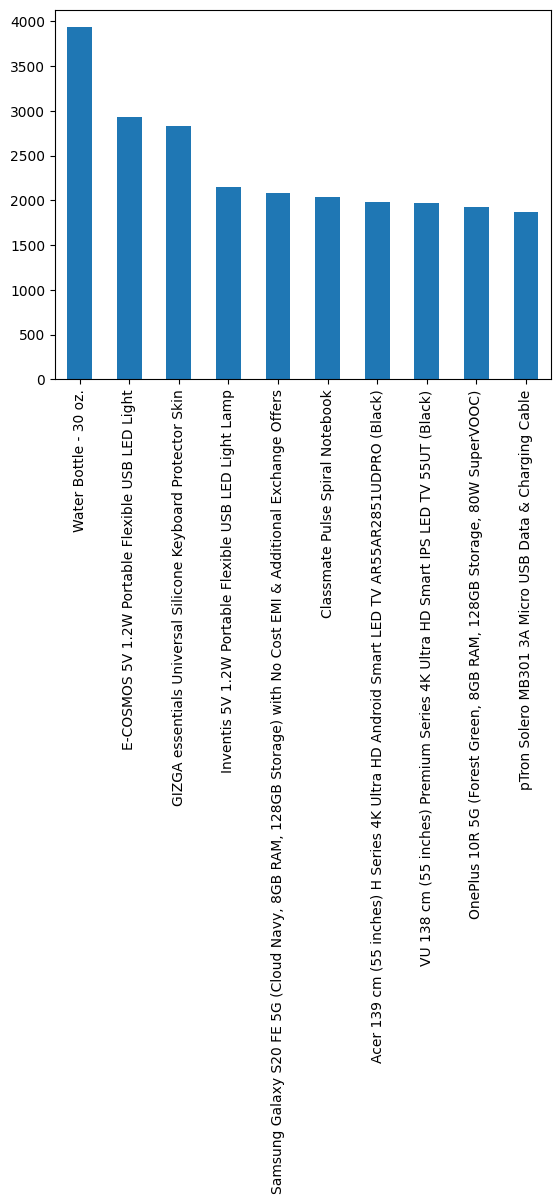

In [10]:
#bar chart
sales_product_top = (df['product_name'].value_counts().sort_values(ascending=False)).iloc[:10]
sales_product_top.plot(kind='bar')

<Axes: >

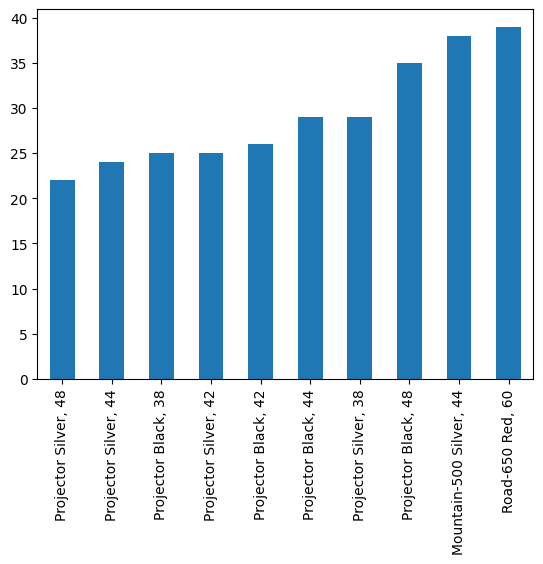

In [11]:
sales_product_bottom = (df['product_name'].value_counts().sort_values().iloc[:10])
sales_product_bottom.plot(kind='bar')

<Axes: ylabel='Frequency'>

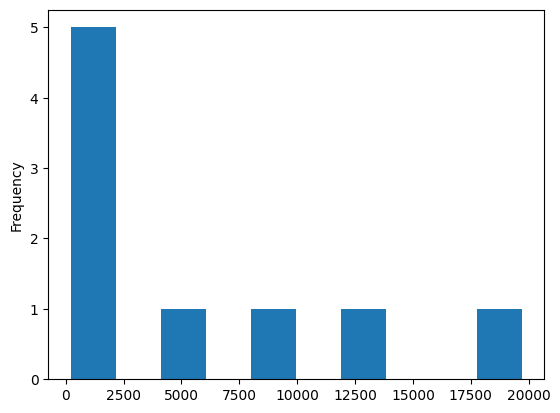

In [12]:
#histogram
sales_product_line =df['product_line'].value_counts().sort_values(ascending=False)
sales_product_line.plot(kind='hist')

<Axes: >

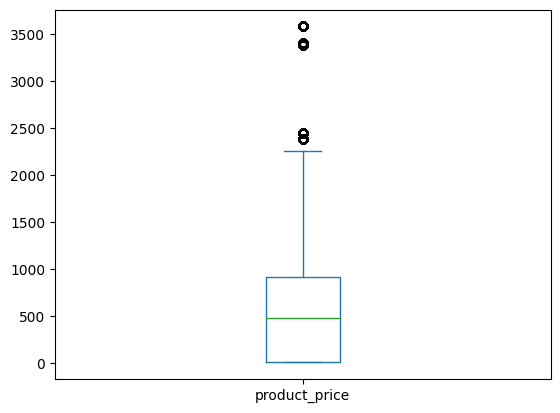

In [13]:
#box plot
df['product_price'].plot(kind='box')

<Axes: >

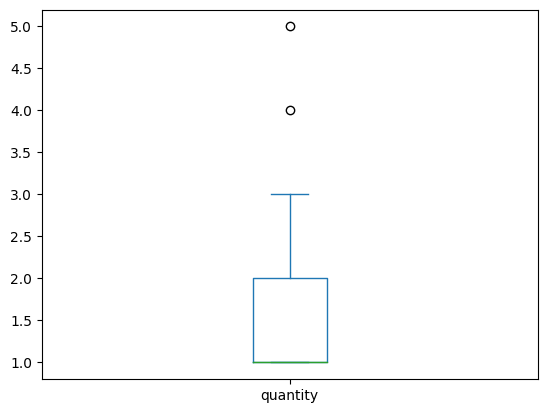

In [14]:
df['quantity'].plot(kind='box')

<Axes: xlabel='product_line', ylabel='product_price'>

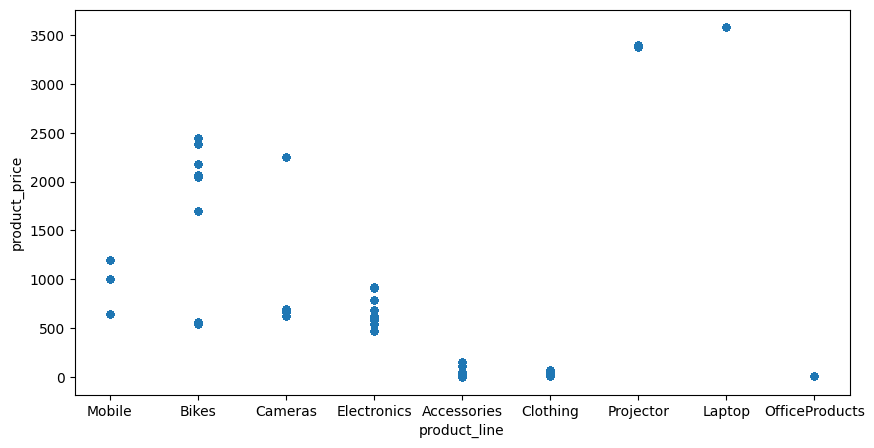

In [15]:
#scatter plot
df.plot(kind='scatter', x='product_line', y='product_price', figsize=(10,5))

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [16]:
#month of year
df['month'] = df['order_date'].dt.month
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,month
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,7
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,7
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,7
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,7
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,7


In [17]:
df.sort_values(by='order_date', ascending=False)


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,month
18478,74119,2029-08-02,2029-08,Katherine Adams,West Maryview,NEW HAMPSHIRE,2.0,GIZGA essentials Universal Silicone Keyboard P...,Accessories,4.99,8
31097,74113,2029-08-01,2029-08,Kaitlyn Scott,Port Jefferybury,RHODE ISLAND,2.0,pTron Solero MB301 3A Micro USB Data & Chargin...,Accessories,9.99,8
35078,74113,2029-08-01,2029-08,Kaitlyn Scott,Port Jefferybury,RHODE ISLAND,2.0,Water Bottle - 30 oz.,Accessories,4.99,8
20683,74109,2029-07-31,2029-07,Joy Alonso,Brownburgh,WASHINGTON,1.0,Hydration Pack - 70 oz.,Accessories,54.99,7
31096,74109,2029-07-31,2029-07,Joy Alonso,Brownburgh,WASHINGTON,2.0,pTron Solero MB301 3A Micro USB Data & Chargin...,Accessories,9.99,7
...,...,...,...,...,...,...,...,...,...,...,...
11303,73965,1922-06-28,1922-06,Jonathan Alexander,Davisland,WEST VIRGINIA,2.0,Redmi 126 cm (50 inches) 4K Ultra HD Android S...,Electronics,548.77,6
40112,73953,1922-06-28,1922-06,Jay Suri,Mcmillanside,VIRGINIA,1.0,"Road-250 Black, 48",Bikes,2181.56,6
27514,73993,1922-06-28,1922-06,Hunter Lewis,Danielview,NEW YORK,2.0,E-COSMOS 5V 1.2W Portable Flexible USB LED Light,Accessories,2.29,6
39236,74011,1922-06-28,1922-06,Jenny Goel,East Adam,WISCONSIN,1.0,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",Mobile,1000.44,6


<ipython-input-21-ba061d7347c9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='quantity', data=df, estimator=sum, ci=None)


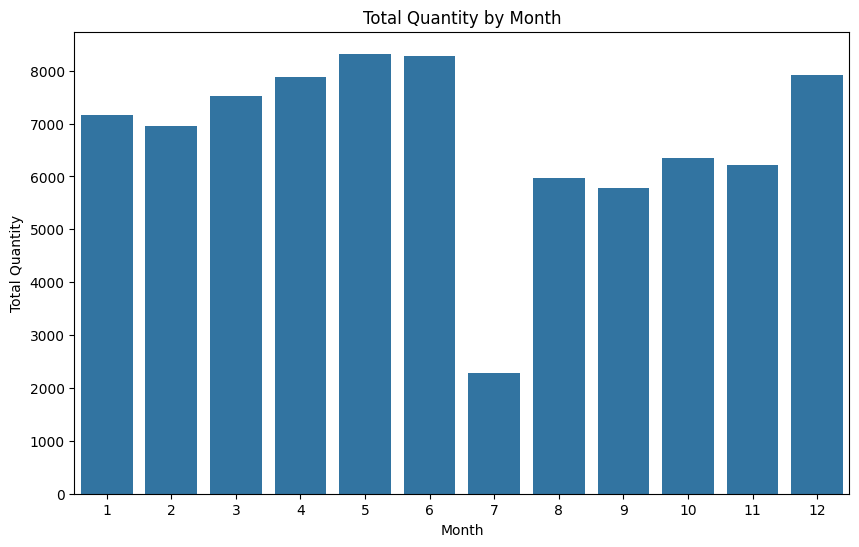

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='quantity', data=df, estimator=sum, ci=None)
plt.title('Total Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()


<ipython-input-24-91b3a05a816d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state_province', y='quantity', data=df, estimator=sum, ci=None)


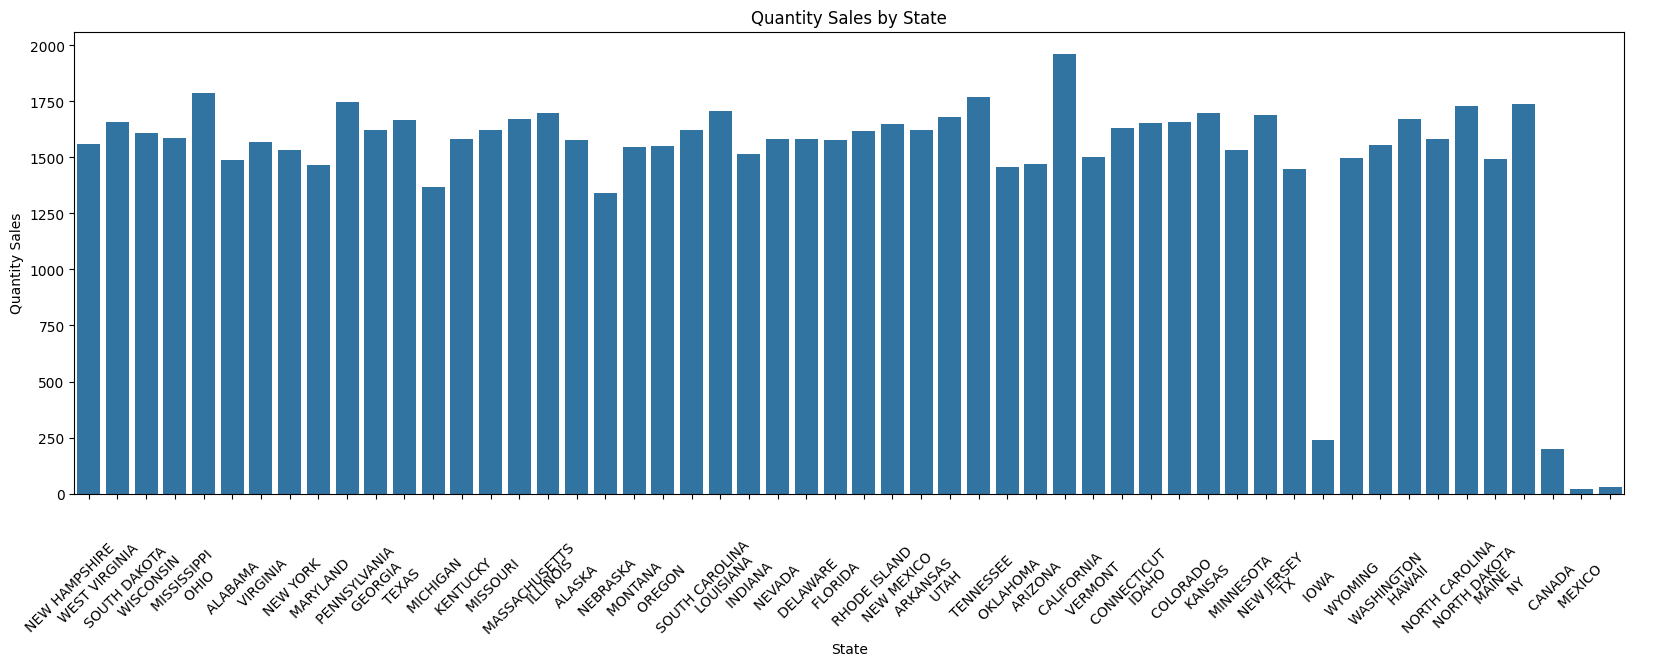

In [24]:
#sales by state
plt.figure(figsize=(20, 6))
sns.barplot(x='state_province', y='quantity', data=df, estimator=sum, ci=None)
plt.title('Quantity Sales by State')
plt.xlabel('State')
plt.ylabel('Quantity Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-81c2908af9e2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_line', y='quantity', data=df, estimator=sum, ci=None)


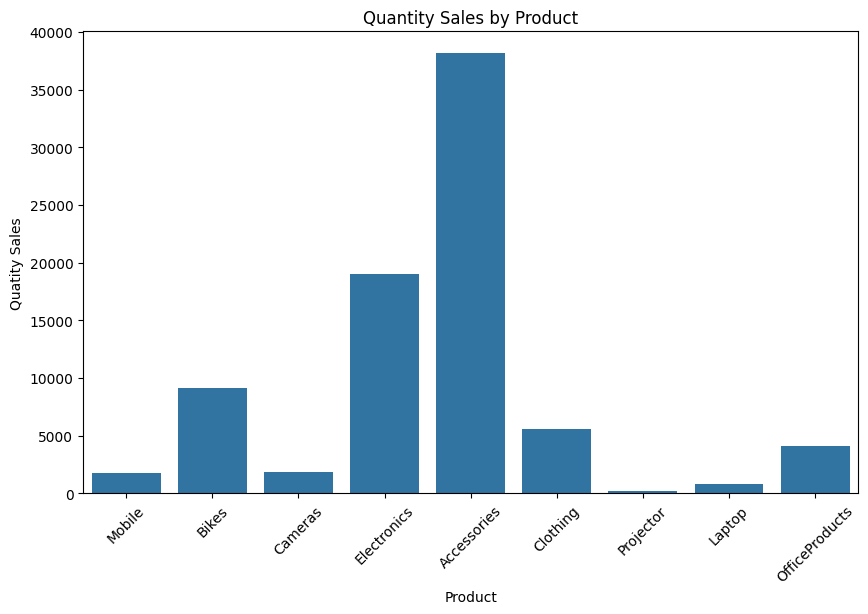

In [26]:
#sales by product
plt.figure(figsize=(10, 6))
sns.barplot(x='product_line', y='quantity', data=df, estimator=sum, ci=None)
plt.title('Quantity Sales by Product')
plt.xlabel('Product')
plt.ylabel('Quatity Sales')
plt.xticks(rotation=45)
plt.show()


## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

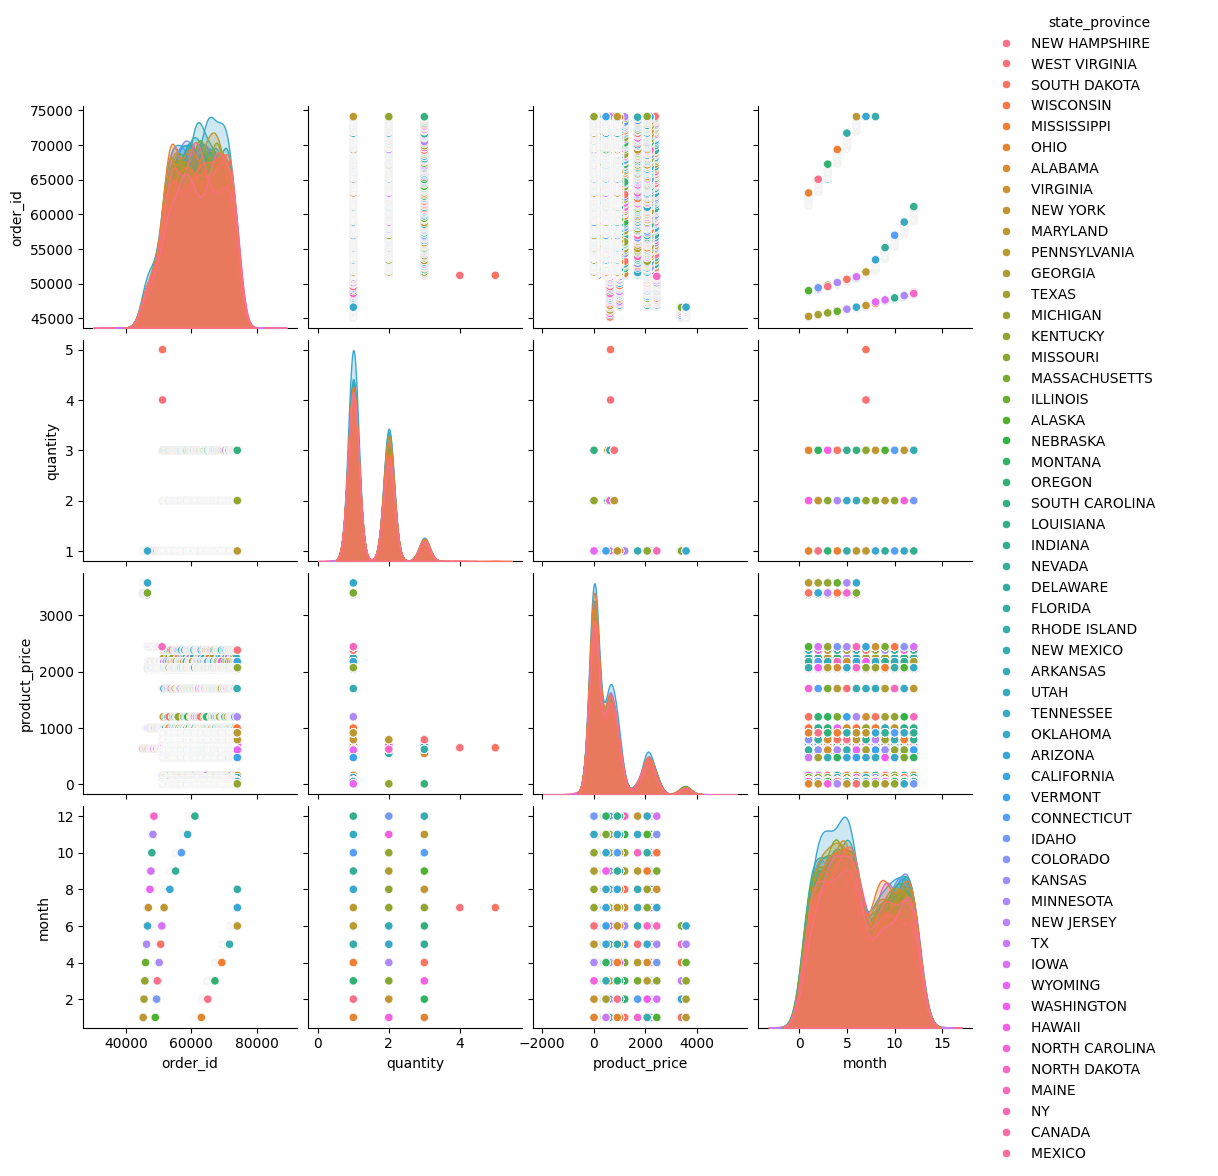

In [27]:
#pair plot
sns.pairplot(df, hue='state_province', dropna=True)